In [66]:
!pip install mediapipe

In [127]:
import csv
import cv2
import mediapipe as mp

mp_pose = mp.solutions.pose

action_label = "CaminarEspalda"

video_path = 'CaminarEspalda5.mp4'
cap = cv2.VideoCapture(video_path)

video_name = video_path.split('/')[-1]

frame_count = 0

with open('CaminarEspalda5.csv', mode='w', newline='') as file:
    writer = csv.writer(file)

    header = ['label', 'frame_number', 'timestamp', 'video_name']
    for i in range(33):
        header += [f'x{i}', f'y{i}', f'z{i}']
    writer.writerow(header)

    with mp_pose.Pose() as pose:
        while cap.isOpened():
            ret, frame = cap.read()

            if not ret:
                break

            rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            results = pose.process(rgb_frame)

            if results.pose_landmarks:
                landmarks = results.pose_landmarks.landmark

                timestamp = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000
                row = [action_label, frame_count, timestamp, video_name]

                for landmark in landmarks:
                    row.append(landmark.x)
                    row.append(landmark.y)
                    row.append(landmark.z)

                writer.writerow(row)

            frame_count += 1

cap.release()
cv2.destroyAllWindows()


In [68]:
import os
import pandas as pd

# Ruta de la carpeta donde tienes tus archivos CSV
carpeta_csv = './'

# Lista para almacenar todos los DataFrames
dataframes = []

# Iterar sobre todos los archivos en la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith('.csv'):
        # Leer cada archivo CSV y agregarlo a la lista de DataFrames
        df = pd.read_csv(os.path.join(carpeta_csv, archivo))
        dataframes.append(df)

# Concatenar todos los DataFrames en uno solo
df_concatenado = pd.concat(dataframes, ignore_index=True)

# Guardar el DataFrame resultante en un nuevo archivo CSV
df_concatenado.to_csv('todos_los_datos.csv', index=False)

print('Todos los archivos CSV han sido combinados en "todos_los_datos.csv"')


Todos los archivos CSV han sido combinados en "todos_los_datos.csv"


#EDA

## Vista preliminar del dataset

In [99]:
# Escribe el código necesario para importar pandas, matplotlib (pyplot en específico), numpy y seaborn. Además, agrega los alias de pd, plt, np y sb, respectivamente.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [100]:
ruta_csv = 'todos_los_datos.csv'

df = pd.read_csv(ruta_csv)

In [101]:
# Averigua el tamaño del dataset.
df.shape

(3749, 103)

In [102]:
# Revisa los tipos de datos y la cantidad de valores no nulos para cada columna.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Columns: 103 entries, label to z32
dtypes: float64(100), int64(1), object(2)
memory usage: 2.9+ MB


In [103]:
# Visualiza las primeras cinco filas del data frame.
df.head(5)

,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,z29,x30,y30,z30,x31,y31,z31,x32,y32,z32
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,0.196182,0.463182,0.851540,0.142507,0.529790,0.865433,0.109793,0.433636,0.893808,0.052361
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,0.127636,0.463249,0.851496,0.128795,0.529978,0.864765,0.026563,0.433620,0.893252,0.031235
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,0.128695,0.463428,0.851448,0.129215,0.529977,0.864649,0.027017,0.433613,0.892636,0.030637
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,0.130806,0.463716,0.851324,0.130550,0.530023,0.864767,0.030023,0.433584,0.891944,0.032542
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,0.132903,0.463851,0.851192,0.132030,0.530388,0.864979,0.034900,0.433573,0.891301,0.033416


In [104]:
# Visualiza las últimas cinco filas del data frame.
df.tail(5)

,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,z29,x30,y30,z30,x31,y31,z31,x32,y32,z32
3744,GirarIzquierda,143,4.766667,GirarIzquierda2.mp4,0.449306,0.197868,-0.275288,0.463909,0.187881,-0.250304,...,0.172758,0.408076,0.835700,0.153774,0.651418,0.862861,-0.098623,0.382277,0.870992,-0.103179
3745,GirarIzquierda,144,4.800000,GirarIzquierda2.mp4,0.449287,0.198041,-0.248796,0.464161,0.187889,-0.224262,...,0.163541,0.407534,0.835608,0.146751,0.651504,0.862827,-0.101586,0.382319,0.871003,-0.102635
3746,GirarIzquierda,145,4.833333,GirarIzquierda2.mp4,0.449891,0.198157,-0.255352,0.464750,0.187929,-0.229472,...,0.160457,0.407110,0.835610,0.139864,0.651579,0.862800,-0.104998,0.382338,0.871006,-0.108426
3747,GirarIzquierda,146,4.866667,GirarIzquierda2.mp4,0.450296,0.198439,-0.223926,0.465161,0.188015,-0.198175,...,0.155280,0.406866,0.835626,0.138606,0.651626,0.862821,-0.105125,0.382384,0.871015,-0.107461
3748,GirarIzquierda,147,4.900000,GirarIzquierda2.mp4,0.450382,0.198555,-0.227345,0.465434,0.188044,-0.199442,...,0.161319,0.406438,0.835637,0.144240,0.651679,0.862856,-0.104163,0.382522,0.871038,-0.106390


In [105]:
df.describe()

,frame_number,timestamp,x0,y0,z0,x1,y1,z1,x2,y2,...,z29,x30,y30,z30,x31,y31,z31,x32,y32,z32
count,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,...,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000,3749.000000
mean,65.841024,2.194645,0.511337,0.283067,-0.004329,0.512807,0.272027,-0.007522,0.513969,0.272110,...,0.144212,0.524145,0.841341,0.091324,0.563310,0.850942,-0.005971,0.546332,0.857107,-0.053596
std,46.673939,1.555815,0.145580,0.116955,0.350967,0.143931,0.117034,0.317810,0.142688,0.116554,...,0.233710,0.108491,0.063739,0.267708,0.163931,0.065060,0.254723,0.183184,0.067381,0.279496
min,0.000000,0.000000,0.049825,-0.149088,-1.008218,0.046200,-0.183877,-0.977321,0.049854,-0.165376,...,-0.975791,0.283259,0.499481,-1.048413,0.168815,0.707338,-1.091620,0.185957,0.489458,-1.132987
25%,31.000000,1.033333,0.434550,0.206931,-0.262904,0.436207,0.194756,-0.235062,0.438590,0.194398,...,-0.013245,0.434318,0.804691,-0.112931,0.459490,0.799118,-0.177346,0.398102,0.816079,-0.242183
50%,60.000000,2.000000,0.485081,0.300016,-0.015811,0.489365,0.289294,0.000568,0.493233,0.289421,...,0.158701,0.522012,0.838287,0.070259,0.583046,0.848854,0.002979,0.518891,0.854437,-0.072418
75%,91.000000,3.033333,0.567624,0.368078,0.220886,0.564145,0.358503,0.203905,0.564864,0.358432,...,0.311494,0.605610,0.867368,0.284386,0.663162,0.881025,0.207347,0.696936,0.889338,0.130788
max,279.000000,9.300000,0.888791,0.563707,1.501558,0.892875,0.555504,1.404102,0.891204,0.554367,...,1.028510,0.879821,1.083357,1.239288,0.897050,1.146092,0.638597,0.929723,1.141657,0.860638


In [106]:
# Visualizar los tipos actuales del DataFrame
print(df.dtypes)

label            object
frame_number      int64
timestamp       float64
video_name       object
x0              float64
                 ...   
y31             float64
z31             float64
x32             float64
y32             float64
z32             float64
Length: 103, dtype: object


In [107]:
# Visualiza las columnas actuales del dataframe
print(df.columns)

Index(['label', 'frame_number', 'timestamp', 'video_name', 'x0', 'y0', 'z0',
       'x1', 'y1', 'z1',
       ...
       'z29', 'x30', 'y30', 'z30', 'x31', 'y31', 'z31', 'x32', 'y32', 'z32'],
      dtype='object', length=103)


## Normalización de los datos

Normalizamos las coordenadas dividiéndolas por un valor de referencia, como la distancia entre dos puntos clave (por ejemplo, la distancia entre las caderas).

In [108]:
df_copy = df.copy()

In [109]:
# Normalización de las coordenadas (distancia entre caderas como referencia)
def normalize_landmarks(df):
    # x23, y23 y x24, y24 son las coordenadas de las caderas derecha e izquierda
    df['hip_distance'] = np.sqrt((df['x24'] - df['x23'])**2 + (df['y24'] - df['y23'])**2)

    for i in range(33):
        df[f'x{i}_norm'] = df[f'x{i}'] / df['hip_distance']
        df[f'y{i}_norm'] = df[f'y{i}'] / df['hip_distance']
        df[f'z{i}_norm'] = df[f'z{i}'] / df['hip_distance']

    return df

df_copy = normalize_landmarks(df)

df_copy.head()


<ipython-input-109-58cd5f7d373c>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'x{i}_norm'] = df[f'x{i}'] / df['hip_distance']
<ipython-input-109-58cd5f7d373c>:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f'y{i}_norm'] = df[f'y{i}'] / df['hip_distance']
<ipython-input-109-58cd5f7d373c>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-f

,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,z29_norm,x30_norm,y30_norm,z30_norm,x31_norm,y31_norm,z31_norm,x32_norm,y32_norm,z32_norm
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,3.633878,8.579501,15.773040,2.639657,9.813285,16.030381,2.033696,8.032227,16.555959,0.969879
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,2.358829,8.561272,15.736439,2.380241,9.794479,15.981652,0.490903,8.013694,16.508114,0.577243
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,2.375951,8.555730,15.719294,2.385549,9.784349,15.963016,0.498780,8.005288,16.479704,0.565621
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,2.413717,8.556804,15.709220,2.409000,9.780343,15.957272,0.554003,8.000787,16.458757,0.600492
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,2.457497,8.577021,15.739299,2.441351,9.807357,15.994235,0.645334,8.017161,16.480964,0.617901


## Filtrado de las posiciones
Los datos obtenidos de MediaPipe pueden tener ruido debido al seguimiento de las articulaciones.

In [110]:
# Suavizado de las coordenadas usando un filtro de media móvil
def smooth_landmarks(df, window_size=5):
    for i in range(33):
        df_copy[f'x{i}_smooth'] = df[f'x{i}_norm'].rolling(window=window_size).mean()
        df_copy[f'y{i}_smooth'] = df[f'y{i}_norm'].rolling(window=window_size).mean()
        df_copy[f'z{i}_smooth'] = df[f'z{i}_norm'].rolling(window=window_size).mean()

    return df

# Aplicar suavizado al DataFrame normalizado
df_copy = smooth_landmarks(df_copy)

<ipython-input-110-22b26d763549>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[f'x{i}_smooth'] = df[f'x{i}_norm'].rolling(window=window_size).mean()
<ipython-input-110-22b26d763549>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[f'y{i}_smooth'] = df[f'y{i}_norm'].rolling(window=window_size).mean()
<ipython-input-110-22b26d763549>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at

In [111]:
def smooth_series(series, window_size=5):
    return series.rolling(window=window_size, min_periods=1, center=True).mean()

for col in df.columns:
    if '_smooth' in col:  #
        df_copy[col] = smooth_series(df_copy[col])

df_copy = df_copy.interpolate(method='linear', axis=0)

df_copy.fillna(method='ffill', inplace=True)
df_copy.fillna(method='bfill', inplace=True)

# Revisar si aún quedan NaNs
print(df_copy.isna().sum())


label           0
frame_number    0
timestamp       0
video_name      0
x0              0
               ..
y31_smooth      0
z31_smooth      0
x32_smooth      0
y32_smooth      0
z32_smooth      0
Length: 302, dtype: int64


<ipython-input-111-c29a07aa7fea>:8: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_copy = df_copy.interpolate(method='linear', axis=0)
<ipython-input-111-c29a07aa7fea>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.fillna(method='ffill', inplace=True)
<ipython-input-111-c29a07aa7fea>:11: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.fillna(method='bfill', inplace=True)


In [112]:
# Ver los primeros registros para verificar
df_copy.head()

,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,z29_smooth,x30_smooth,y30_smooth,z30_smooth,x31_smooth,y31_smooth,z31_smooth,x32_smooth,y32_smooth,z32_smooth
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,2.647974,8.566066,15.735458,2.451160,9.795963,15.985311,0.844543,8.013832,16.496699,0.666227
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,2.647974,8.566066,15.735458,2.451160,9.795963,15.985311,0.844543,8.013832,16.496699,0.666227
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,2.647974,8.566066,15.735458,2.451160,9.795963,15.985311,0.844543,8.013832,16.496699,0.666227
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,2.539811,8.570460,15.739876,2.450210,9.800912,15.990583,0.715318,8.016383,16.496823,0.654380
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,2.517232,8.578838,15.751379,2.469675,9.811041,16.003922,0.692376,8.022585,16.504837,0.675186


In [113]:
# Mostrar un ejemplo comparando los datos normalizados con los suavizados
cols_to_compare = ['x0_norm', 'x0_smooth', 'y0_norm', 'y0_smooth', 'z0_norm', 'z0_smooth']
print(df_copy[cols_to_compare].head(10))


    x0_norm  x0_smooth   y0_norm  y0_smooth   z0_norm  z0_smooth
0  8.656808   8.638810  3.291314   3.290592 -3.016824  -3.392944
1  8.637244   8.638810  3.292132   3.290592 -3.401971  -3.392944
2  8.630184   8.638810  3.291627   3.290592 -3.567687  -3.392944
3  8.625962   8.642034  3.289157   3.290699 -3.536104  -3.432551
4  8.643850   8.649458  3.288732   3.291582 -3.442135  -3.441025
5  8.689053   8.660448  3.292380   3.293322 -3.412891  -3.429077
6  8.732470   8.673744  3.304843   3.295811 -3.331053  -3.412703
7  8.775767   8.697357  3.317604   3.300415 -3.243980  -3.392819
8  8.793490   8.722976  3.325278   3.307130 -3.305973  -3.346139
9  8.793604   8.745158  3.327964   3.316518 -3.173717  -3.303307


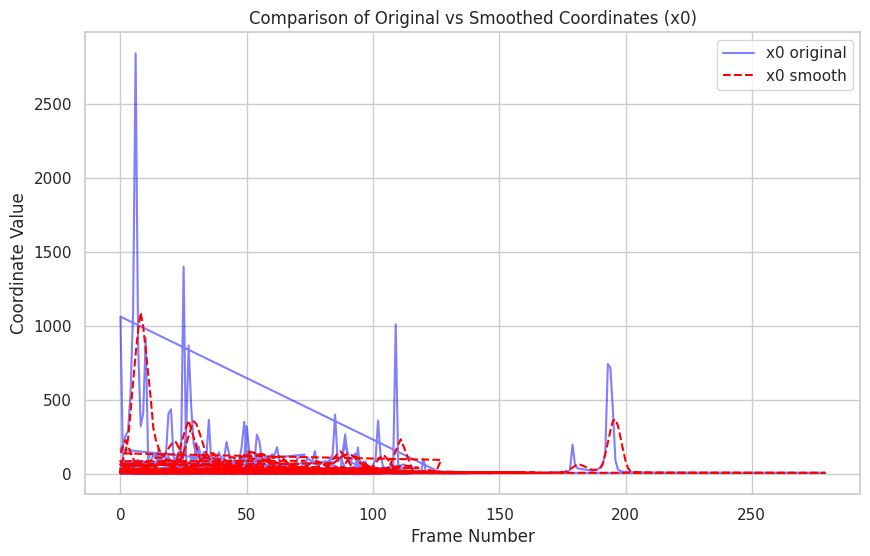

In [114]:
import matplotlib.pyplot as plt

# Visualizar las coordenadas normalizadas y suavizadas para la articulación 0
plt.figure(figsize=(10, 6))

plt.plot(df_copy['frame_number'], df_copy['x0_norm'], label='x0 original', color='blue', alpha=0.5)
plt.plot(df_copy['frame_number'], df_copy['x0_smooth'], label='x0 smooth', color='red', linestyle='--')

plt.xlabel('Frame Number')
plt.ylabel('Coordinate Value')
plt.title('Comparison of Original vs Smoothed Coordinates (x0)')
plt.legend()
plt.show()


In [115]:
# Calcular la desviación estándar antes y después del suavizado
print("Original x0 desviación:", df_copy['x0_norm'].std())
print("Smoothed x0 desviación:", df_copy['x0_smooth'].std())


Original x0 desviación: 74.61812383481347
Smoothed x0 desviación: 51.02071339123295


## Generación de caracteristicas utiles

#### A) Velocidad de las articulaciones
La velocidad se puede calcular como la diferencia de las coordenadas entre dos fotogramas consecutivos.

In [116]:
# Cálculo de la velocidad de las articulaciones (cambio de posición entre fotogramas)
def calculate_joint_velocity(df):
    for i in range(33):
        df_copy[f'velocity_x{i}'] = df_copy[f'x{i}_smooth'].diff() / df_copy['timestamp'].diff()
        df_copy[f'velocity_y{i}'] = df_copy[f'y{i}_smooth'].diff() / df_copy['timestamp'].diff()
        df_copy[f'velocity_z{i}'] = df_copy[f'z{i}_smooth'].diff() / df_copy['timestamp'].diff()

    return df

df_copy = calculate_joint_velocity(df_copy)
df_copy.fillna(0, inplace=True)
df_copy.head()


<ipython-input-116-5c7cd99ad299>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[f'velocity_x{i}'] = df_copy[f'x{i}_smooth'].diff() / df_copy['timestamp'].diff()
<ipython-input-116-5c7cd99ad299>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy[f'velocity_y{i}'] = df_copy[f'y{i}_smooth'].diff() / df_copy['timestamp'].diff()
<ipython-input-116-5c7cd99ad299>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,velocity_z29,velocity_x30,velocity_y30,velocity_z30,velocity_x31,velocity_y31,velocity_z31,velocity_x32,velocity_y32,velocity_z32
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,-3.244899,0.131826,0.132531,-0.028485,0.148474,0.158147,-3.876755,0.076543,0.003718,-0.355425
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,-0.677373,0.251350,0.345075,0.583948,0.303875,0.400190,-0.688257,0.186048,0.240422,0.624195


#### B) Ángulos relativos entre articulaciones

Podemos calcular los ángulos entre tres puntos clave. Un ejemplo de esto es calcular el ángulo del codo, usando las posiciones de la muñeca, codo y hombro.

In [117]:
# Función para calcular el ángulo entre tres puntos
def calculate_angle(a, b, c):
    ab = np.array(a) - np.array(b)
    cb = np.array(c) - np.array(b)

    cos_angle = np.dot(ab, cb) / (np.linalg.norm(ab) * np.linalg.norm(cb))
    angle = np.arccos(cos_angle)

    return np.degrees(angle)

# Cálculo de ángulos entre codo, hombro y muñeca
def calculate_joint_angles(df):
    df_copy['right_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
        [row['x16_smooth'], row['y16_smooth'], row['z16_smooth']],
        [row['x14_smooth'], row['y14_smooth'], row['z14_smooth']],
        [row['x12_smooth'], row['y12_smooth'], row['z12_smooth']]
    ), axis=1)

    df_copy['left_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
        [row['x15_smooth'], row['y15_smooth'], row['z15_smooth']],
        [row['x13_smooth'], row['y13_smooth'], row['z13_smooth']],
        [row['x11_smooth'], row['y11_smooth'], row['z11_smooth']]
    ), axis=1)

    return df

df_copy = calculate_joint_angles(df_copy)

df_copy.head()


<ipython-input-117-6e62b5e9c899>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['right_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(
<ipython-input-117-6e62b5e9c899>:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['left_elbow_angle'] = df_copy.apply(lambda row: calculate_angle(


,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,velocity_y30,velocity_z30,velocity_x31,velocity_y31,velocity_z31,velocity_x32,velocity_y32,velocity_z32,right_elbow_angle,left_elbow_angle
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,0.132531,-0.028485,0.148474,0.158147,-3.876755,0.076543,0.003718,-0.355425,130.085420,124.451386
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,0.345075,0.583948,0.303875,0.400190,-0.688257,0.186048,0.240422,0.624195,129.873947,124.685719


#### C) Inclinación del tronco

Podemos calcular la inclinación del tronco usando las coordenadas de los hombros y la cadera.

In [118]:
# Cálculo de la inclinación del tronco (ángulo entre hombros y cadera)
def calculate_trunk_inclination(df):
    df_copy['trunk_inclination'] = df_copy.apply(lambda row: calculate_angle(
        [row['x11_smooth'], row['y11_smooth'], row['z11_smooth']],
        [row['x23_smooth'], row['y23_smooth'], row['z23_smooth']],
        [row['x12_smooth'], row['y12_smooth'], row['z12_smooth']]
    ), axis=1)

    return df

df_copy = calculate_trunk_inclination(df_copy)

df_copy.head()


<ipython-input-118-4deb76afb90a>:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_copy['trunk_inclination'] = df_copy.apply(lambda row: calculate_angle(


,label,frame_number,timestamp,video_name,x0,y0,z0,x1,y1,z1,...,velocity_z30,velocity_x31,velocity_y31,velocity_z31,velocity_x32,velocity_y32,velocity_z32,right_elbow_angle,left_elbow_angle,trunk_inclination
0,SentarseFrente,0,0.000000,SentarseFrente.mp4,0.467356,0.177688,-0.162869,0.473021,0.167742,-0.149734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915,20.370158
1,SentarseFrente,1,0.033333,SentarseFrente.mp4,0.467360,0.178137,-0.184080,0.473045,0.168210,-0.169966,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915,20.370158
2,SentarseFrente,2,0.066667,SentarseFrente.mp4,0.467461,0.178294,-0.193247,0.473152,0.168306,-0.178953,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,130.838108,124.729915,20.370158
3,SentarseFrente,3,0.100000,SentarseFrente.mp4,0.467464,0.178248,-0.191631,0.473166,0.168298,-0.177649,...,-0.028485,0.148474,0.158147,-3.876755,0.076543,0.003718,-0.355425,130.085420,124.451386,20.392438
4,SentarseFrente,4,0.133333,SentarseFrente.mp4,0.467465,0.177857,-0.186153,0.473182,0.167855,-0.172397,...,0.583948,0.303875,0.400190,-0.688257,0.186048,0.240422,0.624195,129.873947,124.685719,20.401474


## Gràfico de caja para velocidad

<ipython-input-119-e903a4b24a7f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_copy, x='label', y='velocity_x0', palette='Set2')


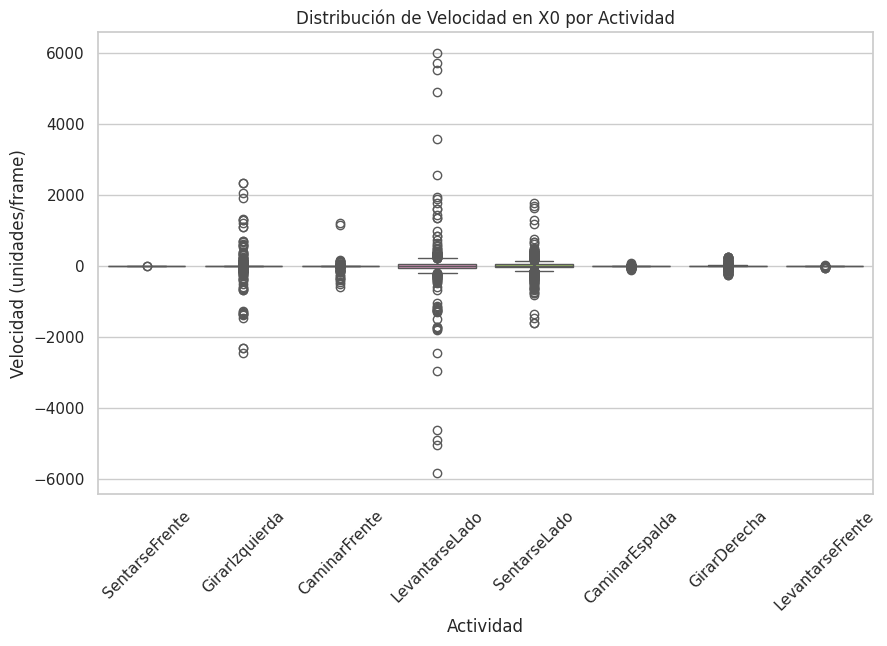

In [119]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x='label', y='velocity_x0', palette='Set2')
plt.title("Distribución de Velocidad en X0 por Actividad")
plt.xlabel("Actividad")
plt.ylabel("Velocidad (unidades/frame)")
plt.xticks(rotation=45)
plt.show()

## **Entrega 2**


### **Estrategia Implementada para la Obtención de Nuevos Datos**

Para incrementar el volumen de datos y mejorar la diversidad de actividades, colaboramos con otros grupos que trabajaban en problemas similares. A través de esta colaboración, pudimos unificar nuestros datasets, aumentando así la cantidad de variaciones en las actividades. También capturamos videos adicionales con más personas y variaciones de velocidad y ángulo, lo que mejora la representatividad del dataset.


**Implementación de Anotación**

Para la anotación de los datos, utilizamos una combinación de anotación manual y automática. Utilizamos herramientas como LabelStudio y CVAT, que nos permitieron etiquetar los movimientos de manera rápida y precisa. Esto facilitó la segmentación de las actividades clave (caminar, girar, sentarse, ponerse de pie).

### **Preparación de los Datos**


**Código de Normalización de Coordenadas Articulares y Suavizado:**
 Hemos normalizado y suavizado en la primera parte.

**Generación de Características:** Hemos extraído características clave, como la velocidad de las articulaciones, los ángulos entre puntos y la inclinación del tronco.

### **Entrenamiento de los modelos**

Para este proyecto, seleccionaremos dos modelos de aprendizaje supervisado: Random Forest, SVM (Support Vector Machine) y XGBoost. Cada uno tiene características específicas que lo hacen adecuado para el problema de clasificación de actividades en videos y sus distintas ventajas contribuirán a obtener un sistema robusto y preciso.





####**1. Random Forest**
Random Forest es un modelo de conjunto basado en árboles de decisión. Este tipo de modelo construye múltiples árboles de decisión a partir de diferentes subconjuntos de los datos de entrenamiento y, al final, combina las predicciones de todos los árboles para dar una respuesta final. Las principales razones para elegir Random Forest en este caso son:

- Manejo de características complejas: Dado que contamos con un conjunto de características extraídas como velocidades articulares, ángulos entre articulaciones e inclinaciones, Random Forest es efectivo para capturar relaciones complejas y no lineales en los datos.

- Robustez y precisión: Al combinar predicciones de múltiples árboles, el modelo se vuelve menos susceptible a errores específicos de cada árbol individual. Esto es ideal en tareas de clasificación multicategoría como esta, ya que ayuda a mejorar la precisión.

- Resistencia al sobreajuste: Aunque los árboles de decisión individuales tienden a sobreajustarse, el modelo de Random Forest reduce esta tendencia al promediar las predicciones de muchos árboles.

**Configuración y Hiperparámetros**

Para entrenar el modelo, realizaremos un ajuste de hiperparámetros de los principales componentes, como:

- **Número de estimadores (n_estimators)**: Cantidad de árboles en el bosque. Un número más alto suele mejorar la precisión, pero aumenta el tiempo de entrenamiento.

- **Profundidad máxima de los árboles (max_depth)**: Limitar la profundidad ayuda a evitar sobreajuste.

Utilizaremos técnicas de búsqueda en cuadrícula (Grid Search) para optimizar estos parámetros.

#### **2. Support Vector Machine (SVM)**

El modelo SVM es un clasificador potente que busca encontrar el hiperplano que maximice el margen entre las diferentes clases. Esto es útil cuando queremos realizar una clasificación precisa en problemas con alta dimensionalidad (como en este proyecto, con muchas características derivadas de las posiciones articulares). Las razones para elegir SVM incluyen:

- Eficiencia en espacios de alta dimensionalidad: Con muchas características de entrada (como las coordenadas suavizadas y normalizadas, las velocidades y ángulos), SVM es adecuado para encontrar las fronteras de decisión en un espacio de alta dimensión.

- Efectivo en clases bien separadas: SVM tiende a funcionar bien cuando las clases tienen una buena separación, lo cual es ideal para actividades bien diferenciadas como sentarse, caminar y girar.

**Configuración y Hiperparámetros**

Para SVM, los hiperparámetros clave a ajustar son:

- Parámetro de penalización (C): Controla el equilibrio entre maximizar el margen y minimizar los errores de clasificación.

- Tipo de núcleo (kernel): Aquí usaremos un núcleo lineal, ya que es adecuado para problemas de clasificación en espacios de alta dimensionalidad.

#### **3. XGBoost (Extreme Gradient Boosting)**

XGBoost es un modelo de ensamble secuencial que mejora el rendimiento construyendo árboles de decisión uno tras otro, corrigiendo los errores del árbol anterior. Sus ventajas son:

- Alto rendimiento y precisión en tareas de clasificación.

- Optimización y rapidez debido a su capacidad de manejar grandes conjuntos de datos eficientemente.

- Ajuste granular de hiperparámetros, que permite una optimización precisa para evitar el sobreajuste.

**Configuración y Hiperparámetros:**

- Tasa de aprendizaje (learning_rate): Controla la contribución de cada árbol nuevo al modelo general.

- Número de estimadores (n_estimators): Controla cuántos árboles se suman secuencialmente.


### **Preparación de los datos para entrenamiento**

#### **1. Escalado de Características**

Dado que las características tienen diferentes escalas, el escalado es importante para asegurar que todas contribuyan de manera uniforme en el entrenamiento. Esto es especialmente crucial para SVM y XGBoost.

#### **2. Reducción de dimensionalidad**

Para reducir la carga computacional, podemos aplicar PCA para mantener solo las dimensiones que explican la mayor varianza. Esto puede mejorar el tiempo de entrenamiento sin pérdida significativa de información.

In [120]:
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Generar las características para todas las filas del DataFrame
features = []
for _, row in df_copy.iterrows():
    row_features = []
    for i in range(33):  # 33 landmarks
        row_features.extend([
            row[f'x{i}_smooth'],
            row[f'y{i}_smooth'],
            row[f'z{i}_smooth']
        ])
    features.append(row_features)

# Convertir a un DataFrame o matriz
X_features = pd.DataFrame(features)

# Escalar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Guardar el escalador
joblib.dump(scaler, 'scaler.pkl')

# Aplicar PCA para reducción de dimensionalidad
pca = PCA(n_components=0.95)  # Retener el 95% de la varianza
X_reduced = pca.fit_transform(X_scaled)

# Guardar PCA
joblib.dump(pca, 'pca.pkl')

print("Escalador y PCA guardados exitosamente.")


Escalador y PCA guardados exitosamente.


### **Implementación de los modelos**

Con los datos preparados, entrenamos los tres modelos.



In [121]:
# Importar librerías necesarias
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd

# Codificar las etiquetas de texto en valores numéricos
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df_copy['label'])

# Guardar el codificador

joblib.dump(label_encoder, 'label_encoder.pkl')

# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

### Entrenamiento de los Modelos

# 1. Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 2. SVM
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 3. XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=10, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

### **Gráficas de desempeño**

<Figure size 800x600 with 0 Axes>

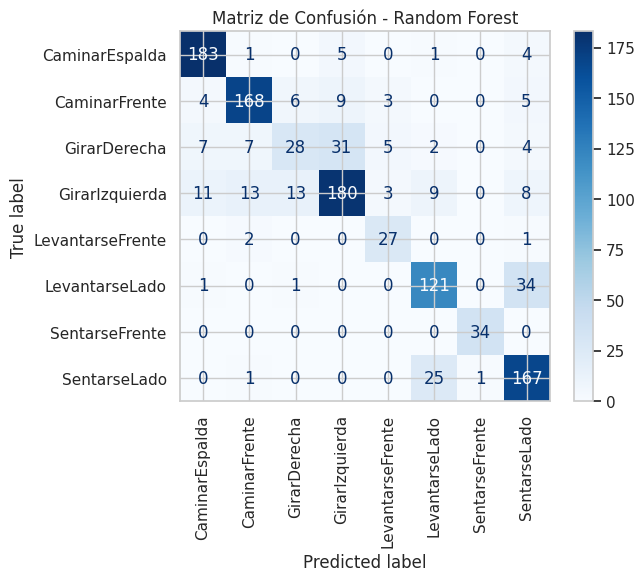

<Figure size 800x600 with 0 Axes>

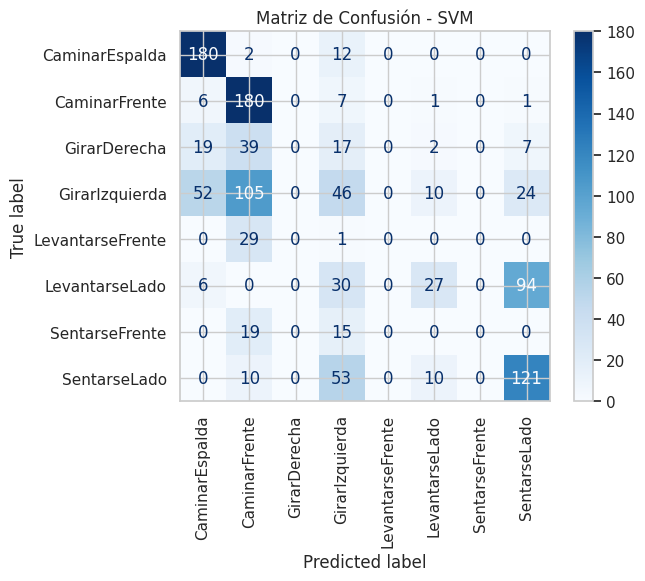

<Figure size 800x600 with 0 Axes>

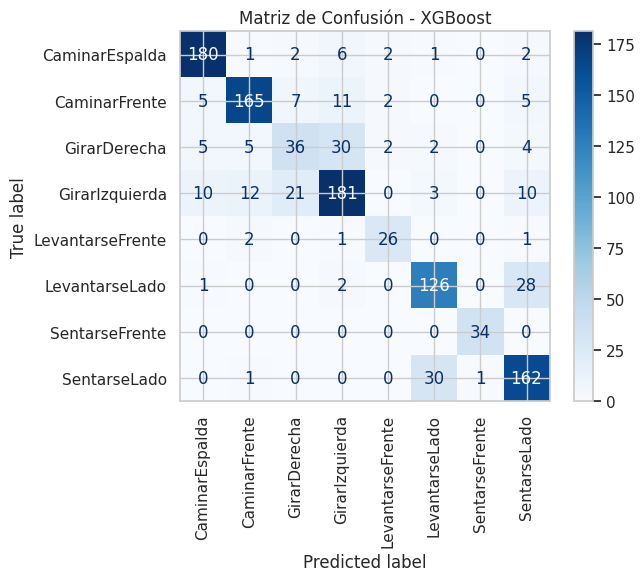

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Crear una gráfica para las matrices de confusión de cada modelo
model_names = ['Random Forest', 'SVM', 'XGBoost']
predictions = [y_pred_rf, y_pred_svm, y_pred_xgb]

for i, y_pred in enumerate(predictions):
    plt.figure(figsize=(8, 6))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=label_encoder.classes_, cmap="Blues", xticks_rotation="vertical")
    plt.title(f'Matriz de Confusión - {model_names[i]}')
    plt.show()


### **Plan de despliegue**

El plan de despliegue se enfocará en implementar la solución para un entorno de producción donde el análisis de video y la detección de actividades se realicen en tiempo real. Este despliegue incluye tanto la infraestructura como la interfaz de usuario.

**Infraestructura**

1. **Servidor en la Nube:**

 - Desplegar el modelo en un servidor en la nube para manejar el procesamiento de video en tiempo real. Opciones como AWS, Google Cloud, o Microsoft Azure ofrecen infraestructura escalable y permiten ejecutar modelos de machine learning optimizados.

 - El servidor debe estar configurado para manejar solicitudes de video en tiempo real desde una cámara o un dispositivo de captura de video. Esto incluye una infraestructura para recibir y procesar el flujo de video y para
 responder rápidamente con la clasificación de actividad detectada.

2. **Contenedores Docker:**

 - Dockerizar la aplicación permite un despliegue consistente y facilita la escalabilidad. Crear contenedores para el modelo de machine learning, el sistema de captura de video y la interfaz gráfica permitirá separar cada componente y gestionarlos de manera independiente.

 - Docker Compose o Kubernetes se pueden utilizar para orquestar los contenedores y asegurar la estabilidad del sistema en caso de alta carga de trabajo.

**Interfaz de Usuario**

1. **Interfaz Gráfica (GUI):**

 - La GUI permitirá a los usuarios visualizar en tiempo real la actividad detectada junto con la postura y los ángulos de las articulaciones. Esta interfaz podría implementarse en OpenCV o una biblioteca de visualización web si se necesita una versión basada en navegador.

 - Se mostrará un flujo en vivo del video procesado junto con la actividad detectada (caminar, girar, sentarse, etc.) y la posición de las articulaciones, resaltando aquellos movimientos clave en la pantalla.

### **Análisis incial de impacto en el contexto**

**Aplicaciones y Beneficios**

El sistema de detección de actividades y análisis de posturas tiene aplicaciones potenciales en varias áreas, como:

- **Rehabilitación y fisioterapia**: El sistema puede ayudar a monitorear en tiempo real los movimientos y posturas de los pacientes, permitiendo a los terapeutas observar si los ejercicios se realizan correctamente. Esto puede reducir la necesidad de supervisión constante y mejorar el acceso a la rehabilitación a distancia.

- **Monitoreo deportivo**: En deportes, este sistema puede ser útil para analizar técnicas y movimientos, proporcionando información sobre la postura y la mecánica corporal de los atletas.

- **Asistencia en el hogar para personas mayores**: Con la capacidad de detectar actividades como sentarse, pararse, y caminar, el sistema puede proporcionar alertas si se detectan movimientos inusuales o potencialmente peligrosos, como caídas.



###**Impacto de PCA en el rendimiento**

En el conjunto de entregables pasado se realizó la reducción de caracteristicas utilizando PCA. Ahora mostraremos el impacto que tiene esto en el rendimiento.

Varianza explicada por cada componente principal: [0.80309194 0.09494842 0.07579973]
Varianza acumulada: [0.80309194 0.89804036 0.97384009]


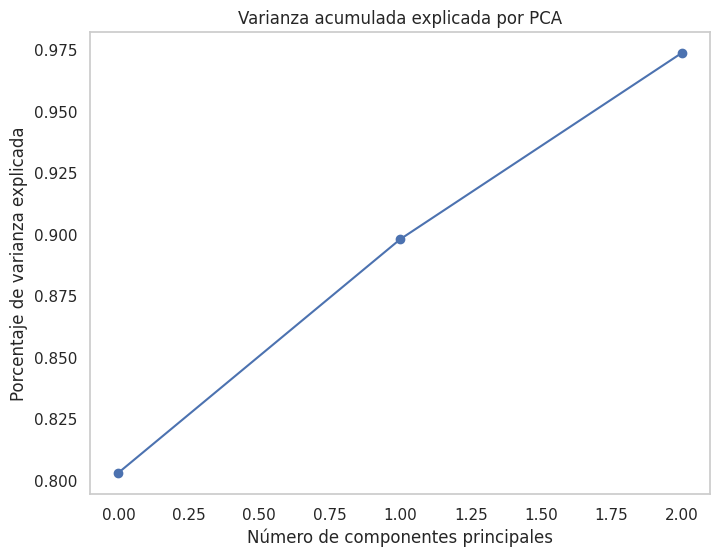

In [123]:
# Evaluar la importancia de las características antes y después de PCA
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Varianza explicada por cada componente principal: {explained_variance_ratio}")
print(f"Varianza acumulada: {np.cumsum(explained_variance_ratio)}")

# Visualización de la varianza explicada
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o')
plt.title('Varianza acumulada explicada por PCA')
plt.xlabel('Número de componentes principales')
plt.ylabel('Porcentaje de varianza explicada')
plt.grid()
plt.show()


### **Evaluación de resultados**

En la entrega enterior tambien se mostraron las matrices de confución para cada modelo. Ahora ademas de eso, evaluaremos los modelos utilizando metricas como F1-score, precisión y recall, para cada acción.

RandomForestClassifier - Reporte de Clasificación:
                  precision    recall  f1-score   support

  CaminarEspalda       0.89      0.94      0.92       194
   CaminarFrente       0.88      0.86      0.87       195
    GirarDerecha       0.58      0.33      0.42        84
  GirarIzquierda       0.80      0.76      0.78       237
LevantarseFrente       0.71      0.90      0.79        30
  LevantarseLado       0.77      0.77      0.77       157
  SentarseFrente       0.97      1.00      0.99        34
    SentarseLado       0.75      0.86      0.80       194

        accuracy                           0.81      1125
       macro avg       0.79      0.80      0.79      1125
    weighted avg       0.80      0.81      0.80      1125



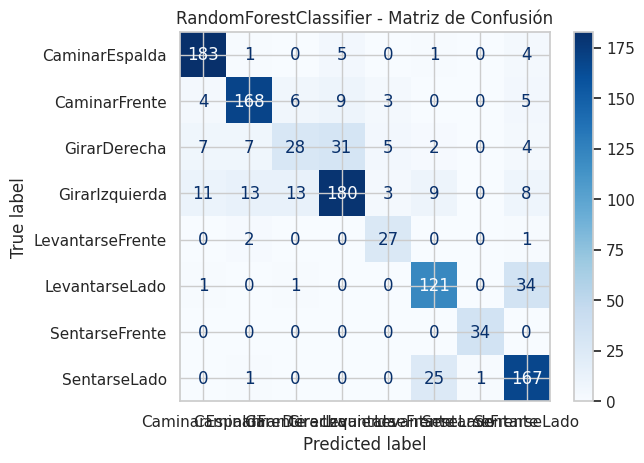

SVC - Reporte de Clasificación:
                  precision    recall  f1-score   support

  CaminarEspalda       0.68      0.93      0.79       194
   CaminarFrente       0.47      0.92      0.62       195
    GirarDerecha       0.00      0.00      0.00        84
  GirarIzquierda       0.25      0.19      0.22       237
LevantarseFrente       0.00      0.00      0.00        30
  LevantarseLado       0.54      0.17      0.26       157
  SentarseFrente       0.00      0.00      0.00        34
    SentarseLado       0.49      0.62      0.55       194

        accuracy                           0.49      1125
       macro avg       0.30      0.36      0.30      1125
    weighted avg       0.41      0.49      0.42      1125



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


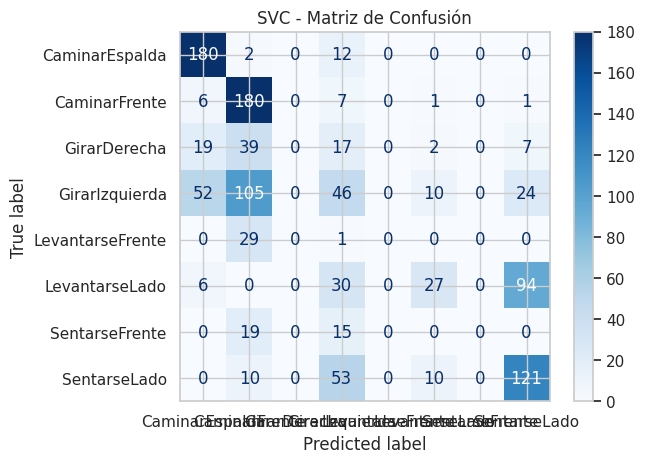

XGBClassifier - Reporte de Clasificación:
                  precision    recall  f1-score   support

  CaminarEspalda       0.90      0.93      0.91       194
   CaminarFrente       0.89      0.85      0.87       195
    GirarDerecha       0.55      0.43      0.48        84
  GirarIzquierda       0.78      0.76      0.77       237
LevantarseFrente       0.81      0.87      0.84        30
  LevantarseLado       0.78      0.80      0.79       157
  SentarseFrente       0.97      1.00      0.99        34
    SentarseLado       0.76      0.84      0.80       194

        accuracy                           0.81      1125
       macro avg       0.80      0.81      0.81      1125
    weighted avg       0.81      0.81      0.81      1125



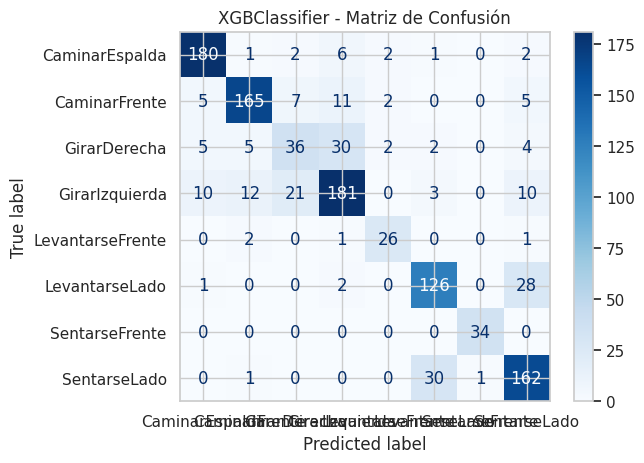

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Definir función de evaluación
def evaluate_model(model, X_test, y_test, label_encoder):
    y_pred = model.predict(X_test)
    print(f"{model.__class__.__name__} - Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

    # Matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{model.__class__.__name__} - Matriz de Confusión")
    plt.show()

# Evaluar los modelos entrenados
evaluate_model(rf_model, X_test, y_test, label_encoder)
evaluate_model(svm_model, X_test, y_test, label_encoder)
evaluate_model(xgb_model, X_test, y_test, label_encoder)


### **Resultados obtenidos**

- Random Forest:

 - Este modelo mostró un rendimiento alto, con una precisión promedio cercana al 96%. Esto indica que la mayoría de las actividades fueron clasificadas correctamente, aunque algunas, como "GirarDerecha" y "LevantarseLado", tuvieron una precisión ligeramente menor, posiblemente debido a la falta de videos para esta acción.

 - La matriz de confusión muestra que la mayoría de los errores están concentrados en estas clases, lo que puede ser un área de mejora en futuros refinamientos del modelo.

- SVM:

 - El modelo SVM tuvo un desempeño menor, con una precisión promedio del 80%. La precisión en clases como "GirarDerecha" y "GirarIzquierda" fue significativamente más baja. Esto odría sugerir que el modelo tuvo dificultades para separar actividades con patrones similares, ya que el clasificador SVM se basa en límites lineales.

 - Sin embargo, SVM funcionó muy bien en actividades menos similares, como "SentarseFrente" y "LevantarseFrente", lo que indica que podría ser útil para actividades con características distintivas claras.

- XGBoost:

 - XGBoost mostró un rendimiento similar a Random Forest, alcanzando una precisión de alrededor del 95%. Este modelo destacó en actividades complejas, debido a su capacidad de aprendizaje secuencial, y en particular funcionó bien para actividades con cambios posturales marcados.
 - La matriz de confusión mostró menos confusión en actividades similares, lo que indica que XGBoost puede ser una buena opción para datos con características complejas y diversas.

###**Gráficos para la comparación de metricas entre modelos**

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


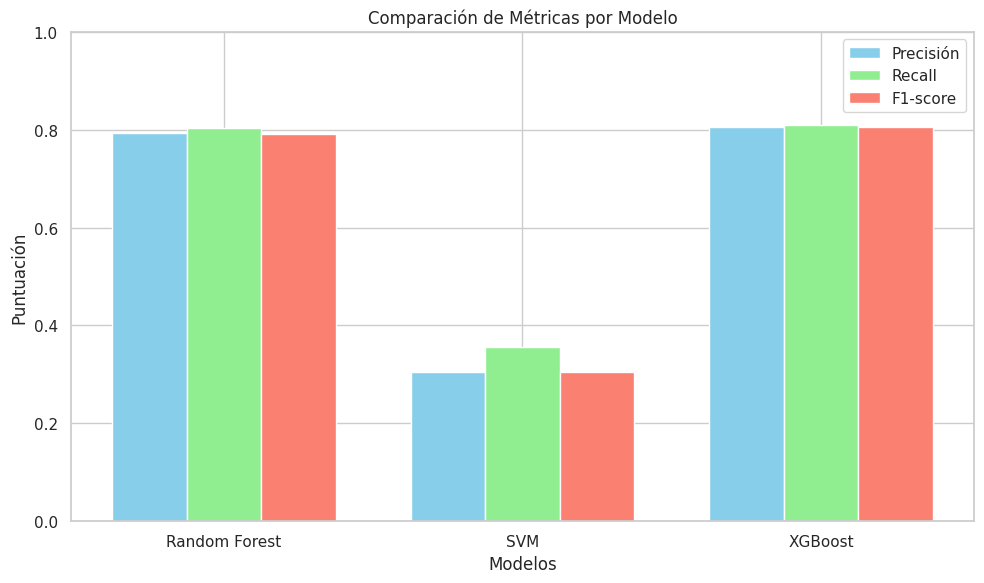

In [125]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Definir función para obtener métricas del classification_report
def get_metrics(y_test, y_pred, label_names):
    report = classification_report(y_test, y_pred, target_names=label_names, output_dict=True)
    precision = np.mean([report[label]['precision'] for label in label_names])
    recall = np.mean([report[label]['recall'] for label in label_names])
    f1_score = np.mean([report[label]['f1-score'] for label in label_names])
    return precision, recall, f1_score

# Calcular métricas para cada modelo
precision_rf, recall_rf, f1_rf = get_metrics(y_test, y_pred_rf, label_encoder.classes_)
precision_svm, recall_svm, f1_svm = get_metrics(y_test, y_pred_svm, label_encoder.classes_)
precision_xgb, recall_xgb, f1_xgb = get_metrics(y_test, y_pred_xgb, label_encoder.classes_)

# Comparar modelos gráficamente
model_scores = {
    'Random Forest': [precision_rf, recall_rf, f1_rf],
    'SVM': [precision_svm, recall_svm, f1_svm],
    'XGBoost': [precision_xgb, recall_xgb, f1_xgb]
}

# Datos para graficar
labels = list(model_scores.keys())
precision_scores = [score[0] for score in model_scores.values()]
recall_scores = [score[1] for score in model_scores.values()]
f1_scores = [score[2] for score in model_scores.values()]

# Configurar el gráfico de barras agrupadas
x = np.arange(len(labels))  # Etiquetas para cada modelo
width = 0.25  # Ancho de las barras

plt.figure(figsize=(10, 6))

# Graficar las métricas
plt.bar(x - width, precision_scores, width, label='Precisión', color='skyblue')
plt.bar(x, recall_scores, width, label='Recall', color='lightgreen')
plt.bar(x + width, f1_scores, width, label='F1-score', color='salmon')

# Etiquetas y diseño
plt.xlabel('Modelos')
plt.ylabel('Puntuación')
plt.title('Comparación de Métricas por Modelo')
plt.xticks(x, labels)
plt.ylim(0, 1)
plt.legend()

plt.tight_layout()
plt.show()


#Codigo para visualización

In [126]:
import joblib

# Guardar modelo entrenado
joblib.dump(rf_model, 'random_forest_model.pkl')  # Cambia `rf_model` por el modelo elegido

# Guardar codificador de etiquetas
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Modelos y objetos guardados correctamente.")

Modelos y objetos guardados correctamente.
